<B> MAJOR-PROJECT [WOMENS CLOTHING E-COMMERCE REVIEW]<B>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [4]:
from tqdm import tqdm
import os
import sqlite3

In [5]:
data = pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv")

In [6]:
data = data.drop(['Unnamed: 0'],axis=1)

In [7]:
data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

<B>NOW we need to make the column names valid for variable use<B>

In [8]:
data.columns = data.columns.str.replace(" ","_")
data.columns

Index(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name'],
      dtype='object')

In [9]:
data

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


<B>DATA DESCTPTION<B><br>
   Clothing_ID             => Unique ID of the product<br>
    
   Age                     => Age of the reviewer<br>
   
   Title                   => Title of the review<br>
   
   Review_Text             => review<br>
   
   Rating                  => Product rating by reviewer<br>
   
   Recommended_IND         => Whether the product is recommended or not by                                   the reviewer<br>
   
   Positive_Feedback_Count => Number of positive feedback on the review<br>
   
   Division_Name           => Name of the division product is in<br>
   
   Department_Name         => Name of the department product is in<br>
   
   Class_Name              => Type of product<br>

In [10]:
data.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [11]:
data.shape

(23486, 10)

<B>NOW CHANGE THE RATINGS INTO GOOD/BAD SECTION BASED ON THEIR RATINGS<br>
    1. good => { RATING > 3 }                                                       2. bad  => { RATING <=3 }

In [12]:
for j in data.columns[data.isna().any()].tolist():
    print(j,' has' ,data[data[j].isna()==True].shape[0], 'NULL values')    

Title  has 3810 NULL values
Review_Text  has 845 NULL values
Division_Name  has 14 NULL values
Department_Name  has 14 NULL values
Class_Name  has 14 NULL values


In [13]:
data['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [14]:
data['Quality'] = 'Bad'
data.loc[data.Rating > 3 ,['Quality']]='Good'

In [15]:
def rtng(rating):
    if rating > 3:
        return 'Good'
    else:
        return 'BAD'

In [16]:
data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Quality
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


<B>NOW let's analyse the data <B>

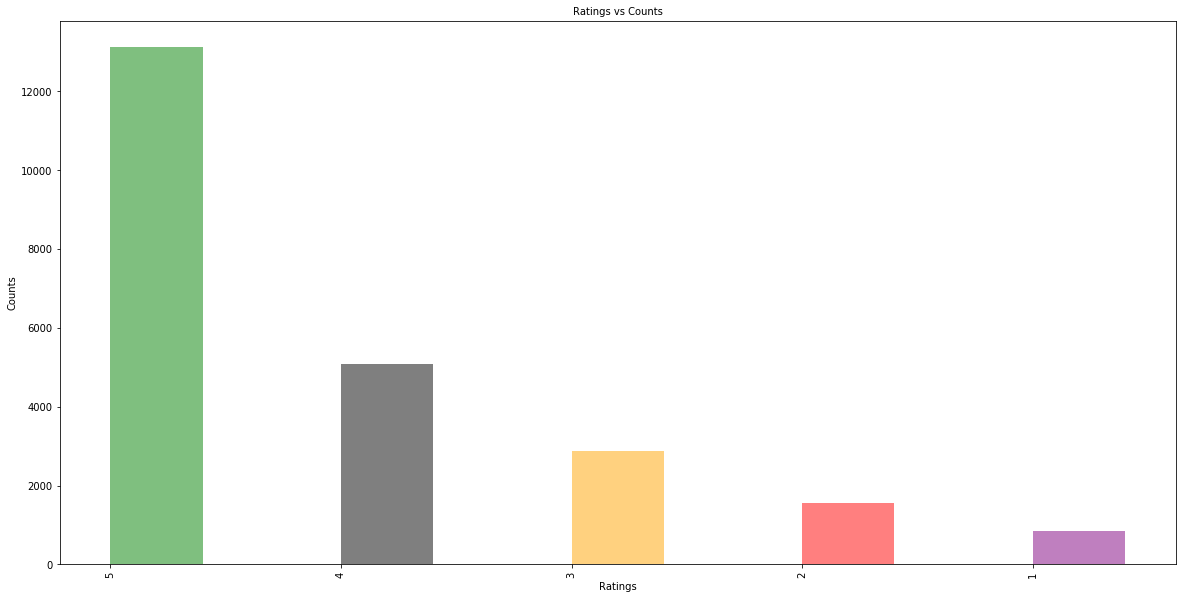

In [17]:
g1 = data.groupby(['Rating'])['Rating'].agg({'counts':'count'})
g1 = g1.sort_values(['counts'],ascending=False)
plt.rcParams["figure.figsize"] = (20,10)
y_pos = np.arange(len(g1.index))
counts = g1['counts'].tolist()
plt.bar(y_pos, counts, align='edge', width=0.4, alpha=0.5, color=["Green","black","Orange","red","purple"])
plt.xticks(y_pos, g1.index, rotation=90, fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Ratings')
plt.title("Ratings vs Counts", fontsize=10)
plt.show()

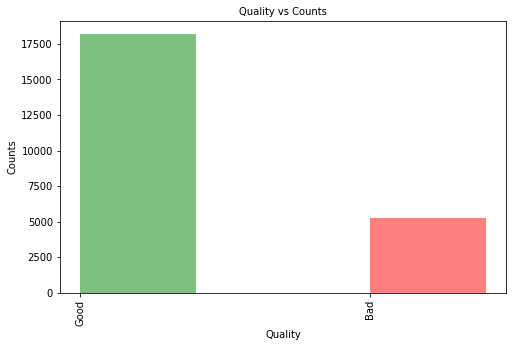

In [18]:
g1 = data.groupby(['Quality'])['Quality'].agg({'counts':'count'})
g1 = g1.sort_values(['counts'],ascending=False)
plt.rcParams["figure.figsize"] = (8,5)
y_pos = np.arange(len(g1.index))
counts = g1['counts'].tolist()
plt.bar(y_pos, counts, align='edge', width=0.4, alpha=0.5, color=["Green","red"])
plt.xticks(y_pos, g1.index, rotation=90, fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Quality')
plt.title("Quality vs Counts", fontsize=10)
plt.show()

 <B>NOTE<B><br>
    There are more Good products as compared to Bad products<br>
    now let us see which are the item that were reviewed the most

In [19]:
data.groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts':'count'}).reset_index().sort_values(by='counts',ascending=False)[:10]

,Clothing_ID,counts
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545
829,829,527
1110,1110,480
868,868,430
895,895,404
936,936,358


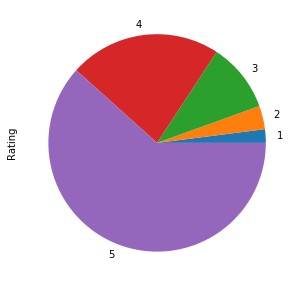

In [20]:
data[data.Clothing_ID==872].groupby(['Rating'])['Rating'].count().plot(kind='pie')

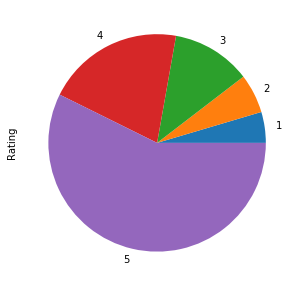

In [21]:
data[data.Clothing_ID==862].groupby(['Rating'])['Rating'].count().plot(kind='pie')

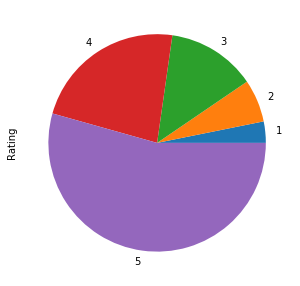

In [22]:
data[data.Clothing_ID==1094].groupby(['Rating'])['Rating'].count().plot(kind='pie')

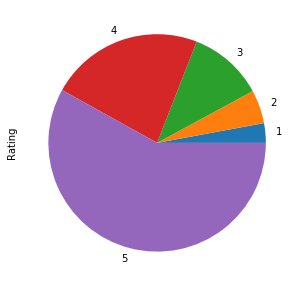

In [23]:
data[data.Clothing_ID==1081].groupby(['Rating'])['Rating'].count().plot(kind='pie')

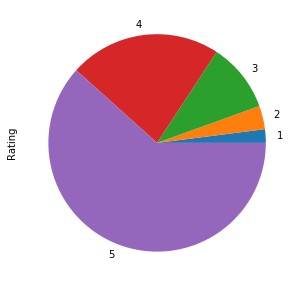

In [24]:
data[data.Clothing_ID==872].groupby(['Rating'])['Rating'].count().plot(kind='pie')

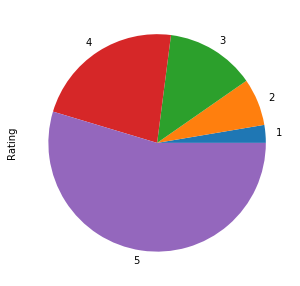

In [25]:
data[data.Clothing_ID==829].groupby(['Rating'])['Rating'].count().plot(kind='pie')

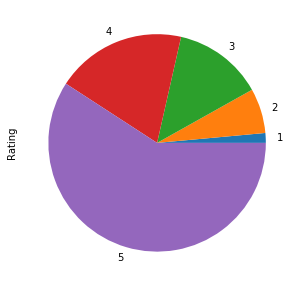

In [26]:
data[data.Clothing_ID==1110].groupby(['Rating'])['Rating'].count().plot(kind='pie')

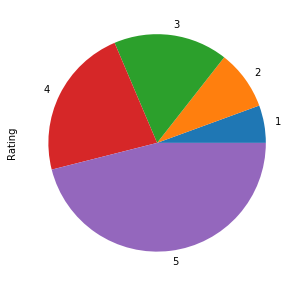

In [27]:
data[data.Clothing_ID==868].groupby(['Rating'])['Rating'].count().plot(kind='pie')

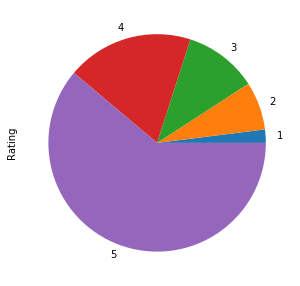

In [28]:
data[data.Clothing_ID==895].groupby(['Rating'])['Rating'].count().plot(kind='pie')

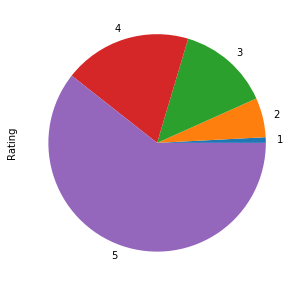

In [29]:
data[data.Clothing_ID==936].groupby(['Rating'])['Rating'].count().plot(kind='pie')

<B> ANALYSIS RESULT <B>
    <br>
    the  department with clothing_ID 868 have most of the highest 1 star rating
    <br>
    the department with clothing_ID 872 have the highest 5 star rating
    <br>
    <br>
    Lets find the products with highest no of Good/Bad reviews

In [30]:
age_range=[[18,24],[24,29],[30,39],[40,49],[50,59],[60,69],[70,79],[80,89],[90,99]]
age_list=[]
for i in age_range:
    age_list.append([str(i[0])+'-'+str(i[1]),data[(data.Age>=i[0]) & (data.Age<=i[1])]['Quality'].count(),
                     data[(data.Age>=i[0]) & (data.Age<=i[1])].groupby('Quality')['Quality'].count()['Good'],
                     data[(data.Age>=i[0]) & (data.Age<=i[1])].groupby('Quality')['Quality'].count()['Bad']])
Age_List=pd.DataFrame(age_list,columns=['Age Group','Total','Good','Bad'])
Age_List

,Age Group,Total,Good,Bad
0,18-24,892,733,159
1,24-29,2284,1722,562
2,30-39,7702,5887,1815
3,40-49,6127,4699,1428
4,50-59,3948,3122,826
5,60-69,2305,1865,440
6,70-79,364,280,84
7,80-89,94,83,11
8,90-99,15,10,5


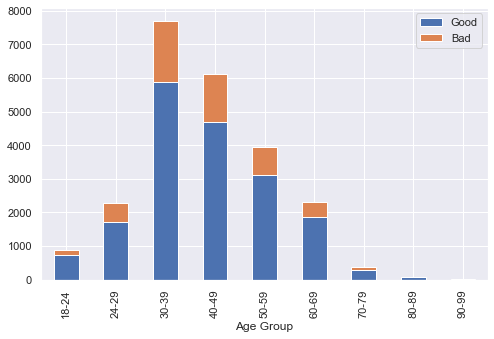

In [31]:
sns.set()
Age_List[['Age Group','Good','Bad']].set_index('Age Group').plot(kind='bar',stacked=True)

In [32]:
data[data.Quality=='Good'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts':'count'}).reset_index().sort_values(by='counts',ascending=False)[:10]

,Clothing_ID,counts
963,1078,796
758,862,627
979,1094,584
966,1081,471
768,872,459
726,829,406
995,1110,377
788,895,323
764,868,295
827,936,285


In [33]:
data[data.Quality=='Bad'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts':'count'}).reset_index().sort_values(by='counts',ascending=False)[:10]

,Clothing_ID,counts
509,1078,228
325,862,179
525,1094,172
331,868,135
297,829,121
512,1081,111
540,1110,103
526,1095,88
335,872,86
330,867,84


<B>Clothing_ID 1078,862,1094 they have the highest Good reviews and Bad reviews as well maybe because of the enormous amount of reviews posted  

## Exploring the Age group

Here, we want to determine the age group of the women that shop here.

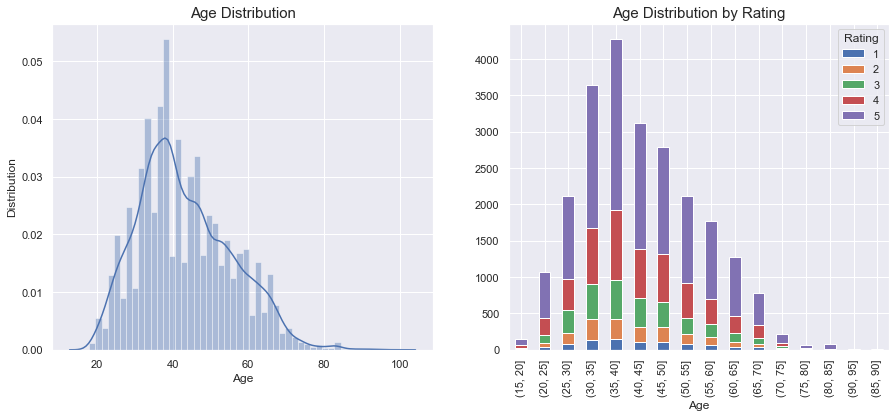

In [34]:
f,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
sns.distplot(data.Age,ax=ax[0])
ax[0].set_title('Age Distribution',fontsize=15)
ax[0].set_ylabel('Distribution')
data.groupby(['Rating',pd.cut(data['Age'],np.arange(0,100,5))])\
        .size()\
       .unstack(0)\
       .plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('Age Distribution by Rating',fontsize=15)
plt.show()

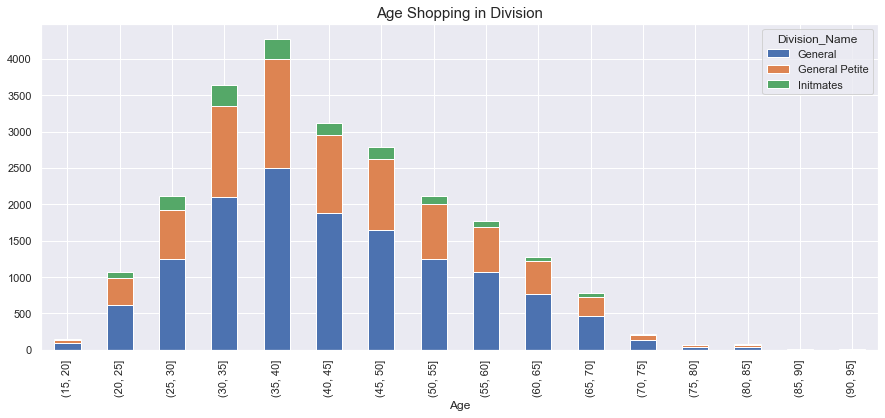

In [35]:
f,ax=plt.subplots(nrows=1,figsize=(15,6))
data.groupby(['Division_Name',pd.cut(data['Age'], np.arange(0,100,5))])\
    .size()\
    .unstack(0)\
    .plot.bar(stacked=True,ax=ax)
ax.set_title('Age Shopping in Division',fontsize=15)
plt.show()

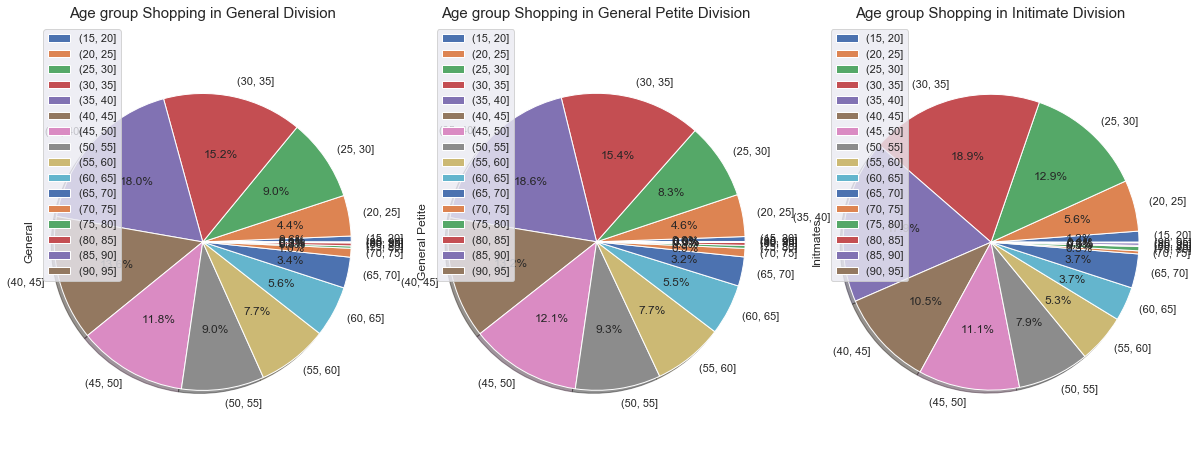

In [36]:
f,ax=plt.subplots(ncols=3,figsize=(20,8))
general=data['Division_Name']=='General'
general=data[general]
general_p=data['Division_Name']=='General Petite'
general_p=data[general_p]
initimate=data['Division_Name']=='Initmates'
initimate=data[initimate]
general.groupby(['Division_Name',pd.cut(general['Age'], np.arange(0,100,5))])\
    .size()\
    .unstack(0)\
    .plot.pie(subplots=True,autopct='%1.1f%%',ax=ax[0],shadow=True)
general_p.groupby(['Division_Name',pd.cut(general_p['Age'], np.arange(0,100,5))])\
    .size()\
    .unstack(0)\
    .plot.pie(subplots=True,autopct='%0.1f%%',ax=ax[1],shadow=True)
initimate.groupby(['Division_Name',pd.cut(initimate['Age'], np.arange(0,100,5))])\
    .size()\
    .unstack(0)\
    .plot.pie(subplots=True,autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Age group Shopping in General Division',fontsize=15)
ax[1].set_title('Age group Shopping in General Petite Division',fontsize=15)
ax[2].set_title('Age group Shopping in Initimate Division',fontsize=15)
ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')
plt.show()

Age group 35-40 were most dominant in the General and General Division accumulating 18.0% and 18.6% respectively, while Age group 30-35 were dominant in the Initimate Division accumulating 18.9%.

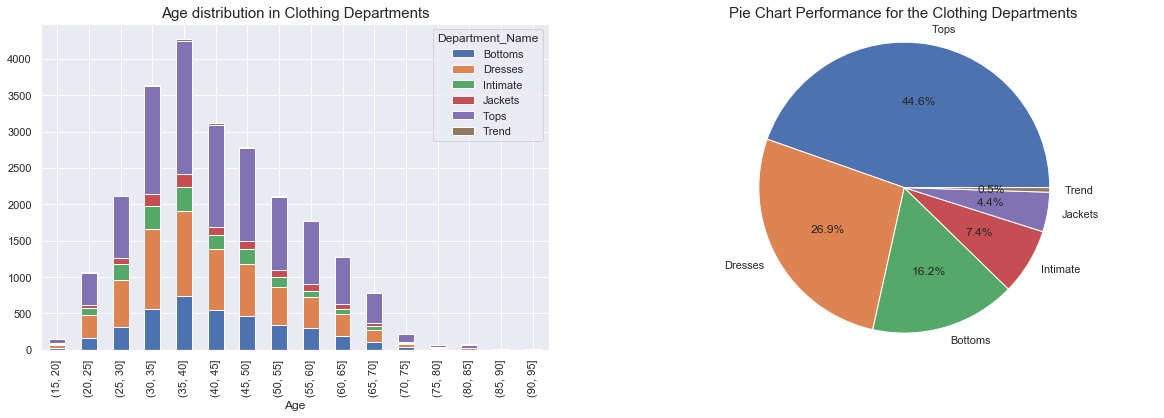

In [37]:
f,ax=plt.subplots(ncols=2,figsize=(20,6))
data.groupby(['Department_Name',pd.cut(data['Age'],np.arange(0,100,5))])\
    .size()\
    .unstack(0)\
    .plot.bar(stacked=True,ax=ax[0])
ax[0].set_title('Age distribution in Clothing Departments',fontsize=15)
x=data['Department_Name'].value_counts()
ax[1].pie(x.values,autopct='%1.1f%%',labels=x.index)
ax[1].set_title('Pie Chart Performance for the Clothing Departments',fontsize=15)
ax[1].axis('equal')
plt.show()

Age group of 20- 75 years were most active in the departments. We see Top Clothing department was dominated mostly with 44.6%,while Trend clothing department wasn't populated with 0.5% which is really low. The trend department isn't really doing much but its meant to bring out trendy clothes. We further explore the Top department to see the classes of clothes.

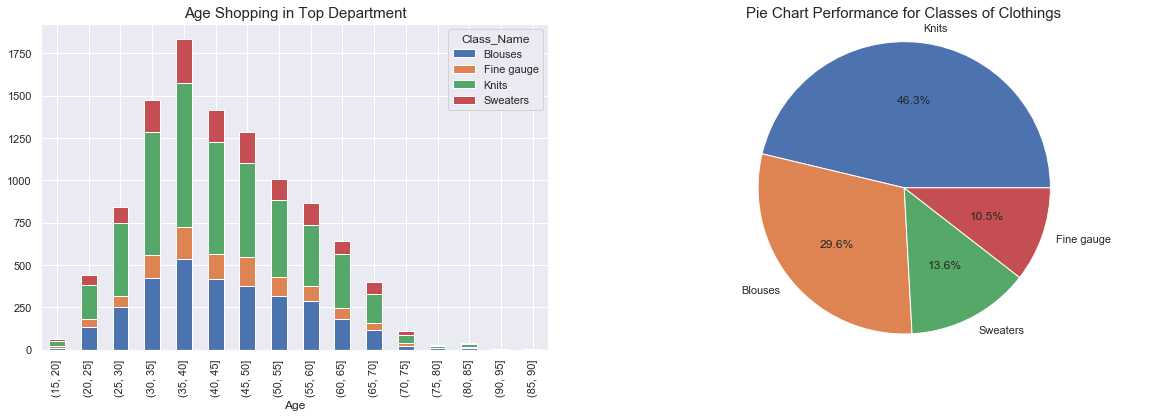

In [38]:
f,ax=plt.subplots(ncols=2,figsize=(20,6))
y=data['Department_Name']=='Tops' ##Exploring the Top department further
x=data[y]
y=x['Class_Name'].value_counts()
x.groupby(['Class_Name',pd.cut(x['Age'], np.arange(0,100,5))])\
    .size()\
    .unstack(0)\
    .plot.bar(stacked=True,ax=ax[0])
ax[0].set_title('Age Shopping in Top Department',fontsize=15)
ax[1].pie(y.values,autopct='%1.1f%%',labels=y.index)
ax[1].set_title('Pie Chart Performance for Classes of Clothings',fontsize=15)
ax[1].axis('equal')
plt.show()

In the Top department, we continue to see the dominance of age 30-40 years old. Most of the age group were about the knits 
classes of clothings, which is quite weird. This is the first time am seeing people into knits clothings.
#### Is the dominance of Knits classes of clothing due to it being recommended by customers for other potential customers?

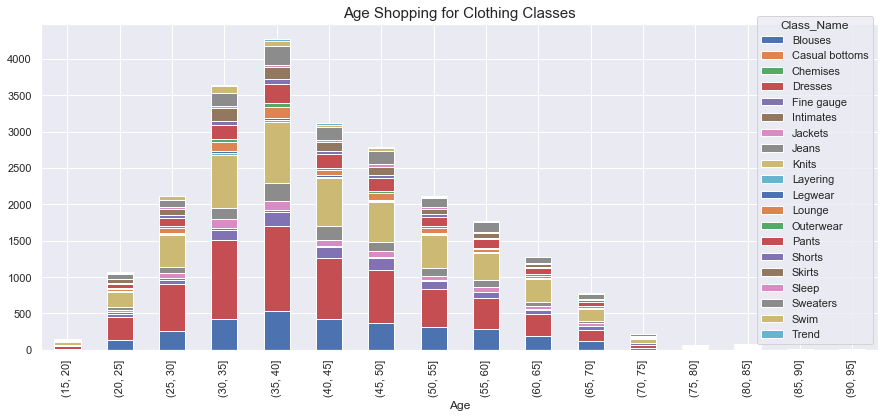

In [39]:
f,ax=plt.subplots(nrows=1,figsize=(15,6))
data.groupby(['Class_Name',pd.cut(data['Age'], np.arange(0,100,5))])\
    .size()\
    .unstack(0)\
    .plot.bar(stacked=True,ax=ax)
ax.set_title('Age Shopping for Clothing Classes',fontsize=15)
plt.show()

## Exploring Ratings and Recommended IND

We want to see if the ratings has any correlation whatsoever with the review text and recommended

In [40]:
data['Review_Text']=data['Review_Text'].astype(str)
data['Title']=data['Title'].astype(str)
data['Review_length']=data['Review_Text'].apply(len)
data['Review_word']=data['Review_Text'].apply(lambda x:(x.lower().split(" ")))
data['Review_word_length']=data['Review_Text'].apply(lambda x:len(x.split(" ")))
data['title_length']=data['Title'].apply(lambda x:len(x.split(' ')))

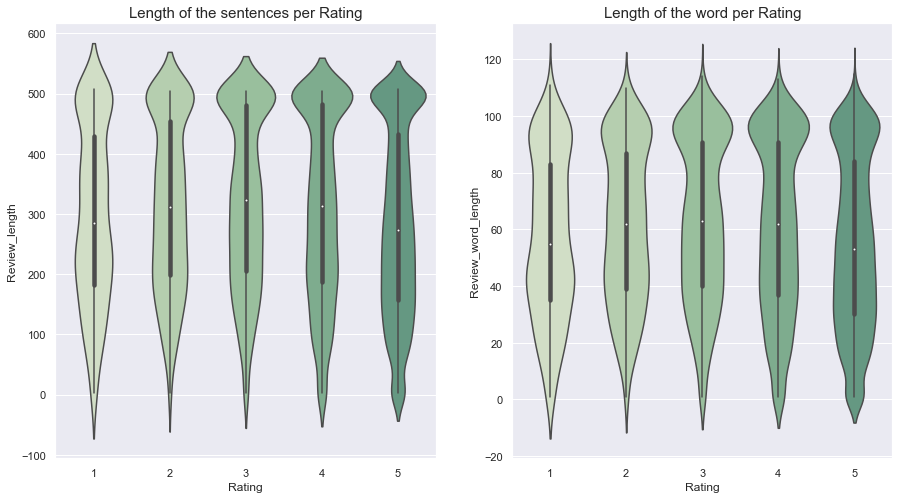

In [41]:
f,ax=plt.subplots(ncols=2,figsize=(15,8))
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)
sns.violinplot(x=data.Rating, y=data.Review_length,palette=pal,ax=ax[0])
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)
sns.violinplot(x=data.Rating, y=data.Review_word_length,palette=pal,ax=ax[1])
ax[0].set_title('Length of the sentences per Rating',fontsize=15)
ax[1].set_title('Length of the word per Rating',fontsize=15)
plt.show()

We see that rating 3 and 4 had more to say in the length of their words.

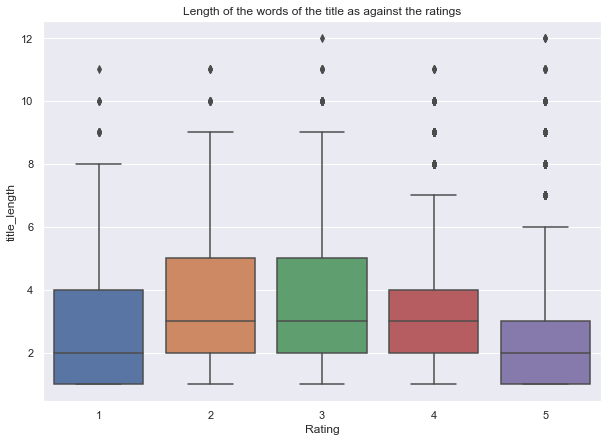

In [42]:
f,ax=plt.subplots(ncols=1,figsize=(10,7))
sns.boxplot(x=data.Rating,y=data.title_length,ax=ax)
ax.set_title("Length of the words of the title as against the ratings")
plt.show()

###### People who gave ratings of 5 were concise with their review title, as the length of the words were short.

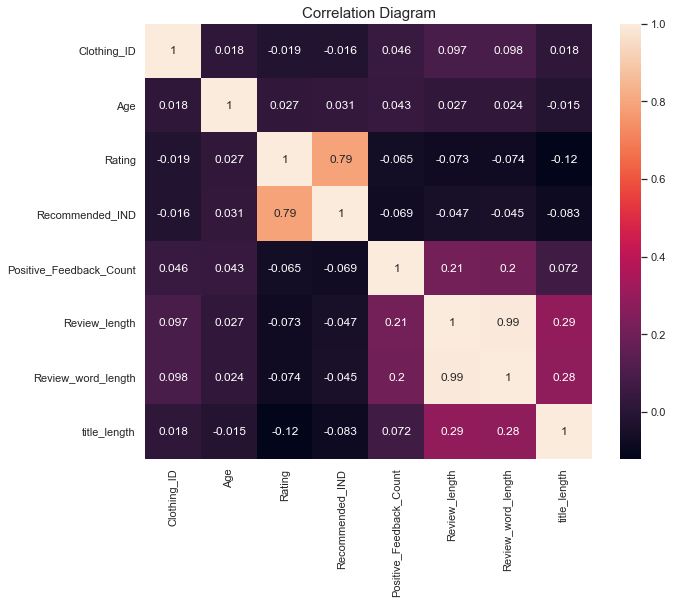

In [43]:
f,ax=plt.subplots(ncols=1,figsize=(10,8))
sns.heatmap(data.corr(),annot=True,ax=ax)
ax.set_title('Correlation Diagram',fontsize=15)
plt.show()

#### Rating is highly correlated to Recommended IND. We explore this further.

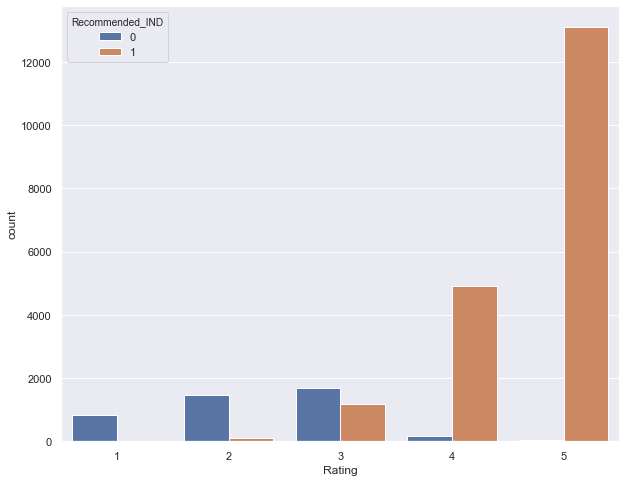

In [44]:
f,ax=plt.subplots(ncols=1,figsize=(10,8))
sns.countplot(x=data.Rating,hue=data['Recommended_IND'],ax=ax)
plt.show()

###### How does a customer expresses is dislike for a product? 
One could be when a customer rates the product 5 and also recommendeds the product for the body of another customer. We see, that products who got ratings of 5 were recommended for other customers.While rating 1&2 had no recommendation, which make sense has we don't expect a low rated product to be recommended for use by other customers.

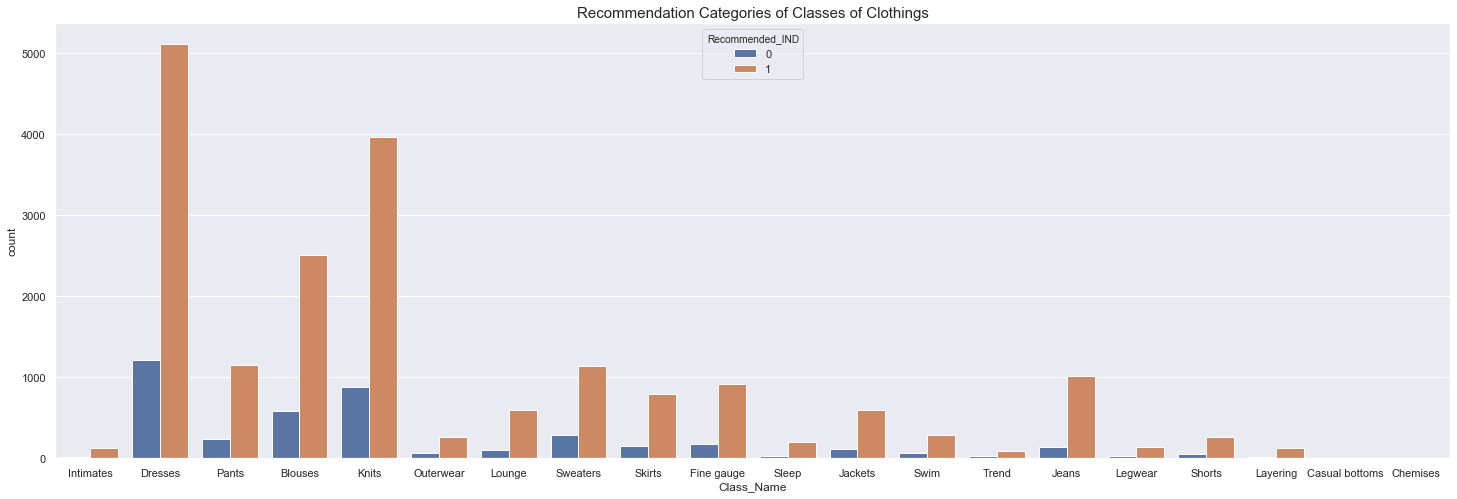

In [45]:
f,ax=plt.subplots(ncols=1,figsize=(25,8))
sns.countplot(x=data['Class_Name'],hue=data['Recommended_IND'],orient='H',ax=ax)
ax.set_title('Recommendation Categories of Classes of Clothings',fontsize=15)
plt.show()

#### The question of "does the recommendation of product by other customers affect the choices of potential customer" comes up.

We see that Dresses and Knits were highly recommended, and also Knits and Dresses were dominant in our previous analysis. 
More exploration would be possible of "Does the recommendation of product by customer affect future customers" if only we had Date and time data. But, also we will explore this with people who found the past review of customers helpful,while looking at the 'positive feedback ' variable.

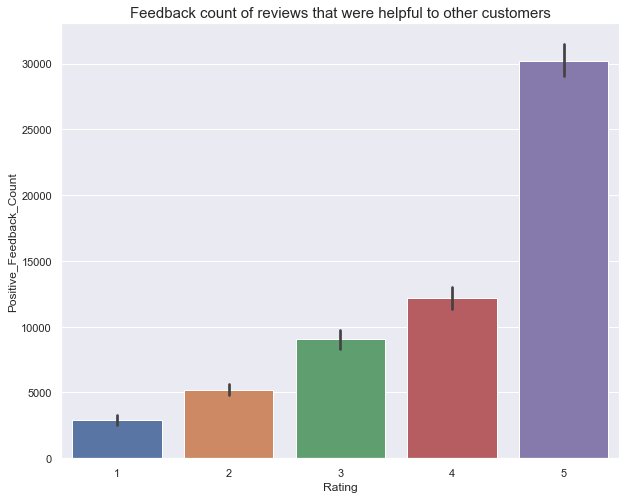

In [46]:
f,ax=plt.subplots(ncols=1,figsize=(10,8))
sns.barplot(x=data['Rating'],y=data['Positive_Feedback_Count'],orient='H',ax=ax,estimator=np.sum)
ax.set_title('Feedback count of reviews that were helpful to other customers',fontsize=15)
plt.show()

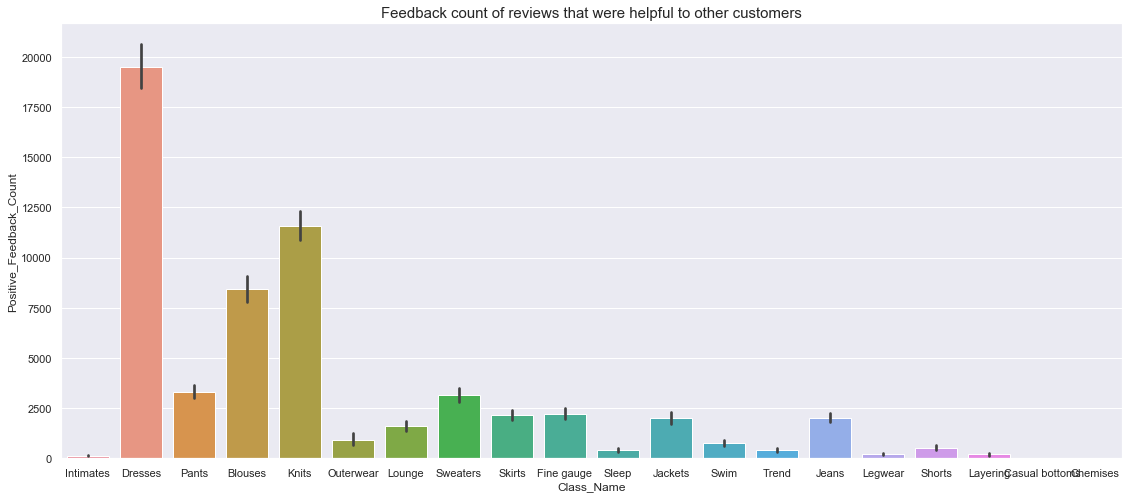

In [47]:
f,ax=plt.subplots(ncols=1,figsize=(19,8))
sns.barplot(x=data['Class_Name'],y=data['Positive_Feedback_Count'],orient='H',ax=ax,estimator=np.sum)
ax.set_title('Feedback count of reviews that were helpful to other customers',fontsize=15)
plt.show()

We notice the trend of Dresses being the most sought after clothe in this clothing e-commerce site. I think this largely do the positve reviews and the recommendation given by the customers for other potiential customers.
###### Reviews of product with ratings of 5 influenced the choices of potential customers in purchasing a particular product. Here, we see Reviews  were helpful with to customer's.

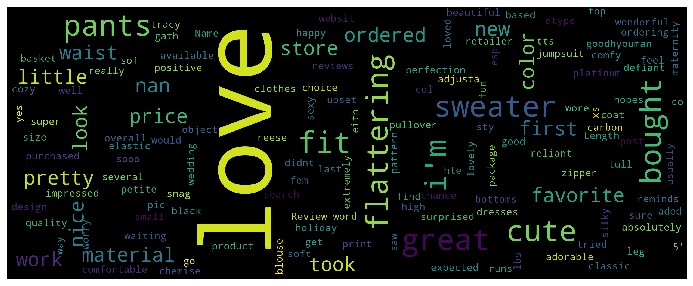

In [56]:
from wordcloud import WordCloud
rec=data['Rating']>=3
rec=data[rec]
rec=data.Review_word
stop_words = set(stopwords.words('english'))
stop = set(stopwords.words('english')+['dress','skirt','shirt'])
f,ax=plt.subplots(ncols=1,figsize=(15,5))
wordcloud = WordCloud(relative_scaling = 1.0,
                      stopwords = stop,# set or space-separated string
                     width=2500,height=1000).generate(str(rec))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

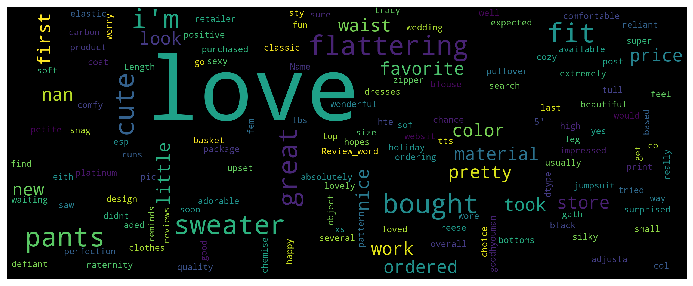

In [57]:
rec_2=data['Rating']<=2
rec_2=data[rec_2]
rec_2=data.Review_word

f,ax=plt.subplots(ncols=1,figsize=(15,5))
wordcloud = WordCloud(relative_scaling = 1.0,
                      stopwords = stop,# set or space-separated string
                      width=2500,height=1000).generate(str(rec_2))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

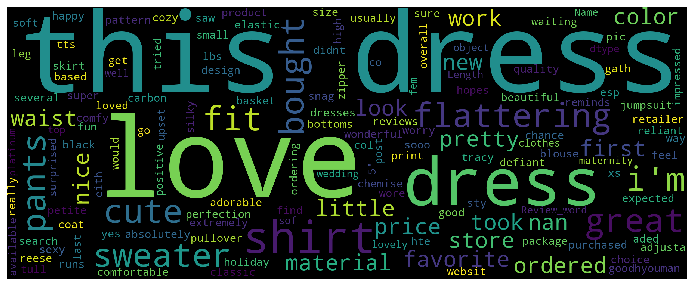

In [60]:
rec=data['Recommended_IND']==1
rec=data[rec]
rec=data.Review_word
stop_words = set(stopwords.words('english'))
stop = set(stopwords.words('english')+['dress','skirt','shirt'])
f,ax=plt.subplots(ncols=1,figsize=(15,5))
wordcloud = WordCloud(relative_scaling = 1.0,
                      stopwords = stop_words,# set or space-separated string
                     width=2500,height=1000).generate(str(rec))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

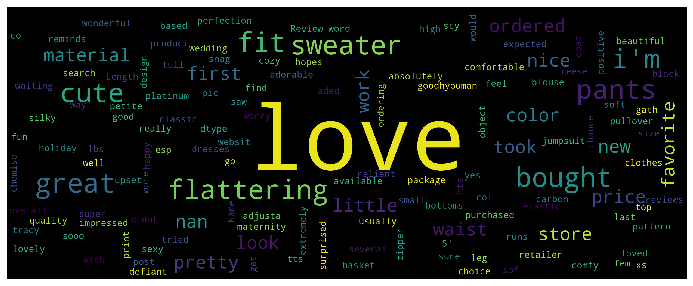

In [61]:
rec=data['Recommended_IND']==0
rec=data[rec]
rec=data.Review_word
stop_words = set(stopwords.words('english'))
stop = set(stopwords.words('english')+['dress','skirt','shirt'])
f,ax=plt.subplots(ncols=1,figsize=(15,5))
wordcloud = WordCloud(relative_scaling = 1.0,
                      stopwords = stop,# set or space-separated string
                     width=2500,height=1000).generate(str(rec))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Opinon Analysis
We want to understand the reason some product have low and high ratings and why some product were recommended and why some other product weren't recommended. Here we leverage on vadersentiment to understand what statement are postitive,negative or neutral.

In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [66]:
data['Review_Text']=data['Review_Text'].apply(lambda x:x.lower())
sentiment= SentimentIntensityAnalyzer()
data['polarity']=data['Review_Text'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
data['positive']=data['Review_Text'].apply(lambda x:sentiment.polarity_scores(x)['pos'])
data['negative']=data['Review_Text'].apply(lambda x: sentiment.polarity_scores(x)['neg'])
data['neutral']=data['Review_Text'].apply(lambda x: sentiment.polarity_scores(x)['neu'])

data.loc[data['polarity']>0,'sentiment_intensity']='positive'
data.loc[data['polarity']==0,'sentiment_intensity']='neutral'
data.loc[data['polarity']<0, 'sentiment_intensity']='negative'

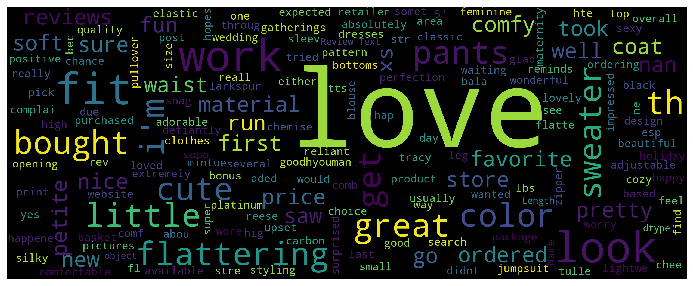

In [71]:
rec=data['sentiment_intensity']=='positive'
rec=data[rec]
rec=data['Review_Text']
stop_words = set(stopwords.words('english'))
stop = set(stopwords.words('english')+['dress','skirt','shirt'])
f,ax=plt.subplots(ncols=1,figsize=(15,5))
wordcloud = WordCloud(relative_scaling = 1.0,
                      stopwords = stop,# set or space-separated string
                     width=2500,height=1000).generate(str(rec))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

This diagram above describes positive sentiment words used in reviews.

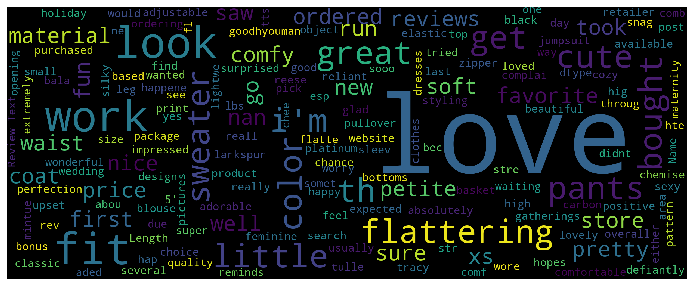

In [72]:
rec=data['sentiment_intensity']=='negative'
rec=data[rec]
rec=data['Review_Text']
stop_words = set(stopwords.words('english'))
stop = set(stopwords.words('english')+['dress','skirt','shirt'])
f,ax=plt.subplots(ncols=1,figsize=(15,5))
wordcloud = WordCloud(relative_scaling = 1.0,
                      stopwords = stop,# set or space-separated string
                     width=2500,height=1000).generate(str(rec))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

This diagram above describes neutral sentiment words used in reviews.

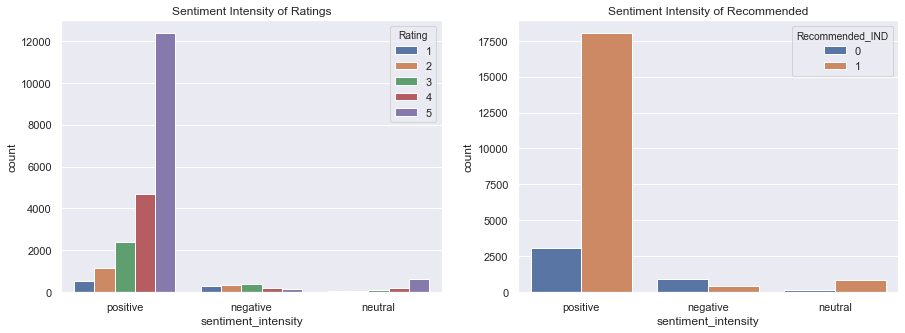

In [69]:
f,ax=plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(x=data.sentiment_intensity,hue=data.Rating,ax=ax[0])
ax[0].set_title('Sentiment Intensity of Ratings')
sns.countplot(x=data.sentiment_intensity,hue=data['Recommended_IND'],ax=ax[1])
ax[1].set_title('Sentiment Intensity of Recommended')
plt.show()

<B> DROPPING NULL VALUES<B>

In [48]:
data_raw = data.copy()

In [49]:
data_raw = data_raw.dropna(subset=['Review_Text'])

In [50]:
data_raw

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Quality,Review_length,Review_word,Review_word_length,title_length
0,767,33,nan,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good,53,"[absolutely, wonderful, -, silky, and, sexy, a...",8,1
1,1080,34,nan,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good,303,"[love, this, dress!, , it's, sooo, pretty., , ...",67,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad,500,"[i, had, such, high, hopes, for, this, dress, ...",98,4
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,124,"[i, love,, love,, love, this, jumpsuit., it's,...",22,3
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,192,"[this, shirt, is, very, flattering, to, all, d...",36,2
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Bad,488,"[i, love, tracy, reese, dresses,, but, this, o...",98,5
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Good,496,"[i, aded, this, in, my, basket, at, hte, last,...",101,3
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,Good,482,"[i, ordered, this, in, carbon, for, store, pic...",97,5
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Good,166,"[i, love, this, dress., i, usually, get, an, x...",34,1
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,Good,360,"[i'm, 5""5', and, 125, lbs., i, ordered, the, s...",72,4


### Supervised Learning 
#### Bernoulli Naives- Bayes
Next, we split our data to train and test data, and check the accuracy of the algorithm using Bernoulli Naives-Bayes.

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
import string
def text_process(review):
    wrd=[word for word in review if word not in string.punctuation]
    wrd=''.join(wrd)
    return [word for word in wrd.split() if word.lower() not in stopwords.words('english')]
data=data.dropna(axis=0,how='any')
lass = data[(data['Rating'] == 1) | (data['Rating'] == 5)]
x=lass['Review_Text']
y=lass['Rating']

In [76]:
sett=CountVectorizer(analyzer=text_process).fit(raw_documents=x)
x= sett.transform(x)
x=x.toarray()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=120)

In [77]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [78]:
predict=clf.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict)*100)

94.34097421203438


<B>we were 94.35% accurate which is pretty much good<B>

<B>ALL THE INFERENCES ARE MADE BELOW EACH GRAPH OR IN THE MIDDLE AS MARKDOWN KERNEL PLEASE DO SEE THEM<B>

## ML-MARCH(MAJOR) PROJECT BY:
### Mrityunjay Singh